# 20カテゴリのテキスト分類

In [6]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [9]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test  = fetch_20newsgroups(subset='test')

In [10]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
newsgroups_train.target.size, newsgroups_test.target.size

(11314, 7532)

In [13]:
print(newsgroups_train.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



In [14]:
# 特徴量ベクトルに変換
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [15]:
X_train = vectorizer.fit_transform(newsgroups_train.data)

In [16]:
X_test = vectorizer.transform(newsgroups_test.data)

In [26]:
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [27]:
X_train.shape, y_train.shape

((11314, 130107), (11314,))

In [28]:
X_test.shape, y_test.shape

((7532, 130107), (7532,))

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [30]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
clf.score(X_test, y_test)

0.82793414763674988

In [32]:
X_train[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [33]:
X_train_0 = X_train[0].toarray()

In [34]:
X_train_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
np.count_nonzero(X_train_0), X_train_0.shape[1]
# 0でない部分は89のみ

(89, 130107)

In [38]:
X_train_0[np.nonzero(X_train_0)]

array([ 0.06332604,  0.14155753,  0.13874908,  0.0953487 ,  0.03709893,
        0.10278592,  0.02991186,  0.0871642 ,  0.16713176,  0.09353931,
        0.13280753,  0.03770449,  0.0690878 ,  0.0343176 ,  0.38133891,
        0.07801368,  0.04951999,  0.06621689,  0.10015015,  0.11603643,
        0.0845253 ,  0.05461429,  0.09714744,  0.13412921,  0.05747015,
        0.08646963,  0.1558717 ,  0.02921528,  0.08342748,  0.03542092,
        0.06363421,  0.09785516,  0.02245166,  0.07313444,  0.07325812,
        0.05097865,  0.04280825,  0.09219024,  0.35383501,  0.01921946,
        0.09036441,  0.0690878 ,  0.06339409,  0.05989857,  0.10936401,
        0.03955173,  0.08844382,  0.03696979,  0.07000411,  0.13157119,
        0.03567186,  0.06521174,  0.05715821,  0.03188937,  0.01992886,
        0.0454964 ,  0.04114286,  0.09913274,  0.05545703,  0.03447138,
        0.10826904,  0.16068606,  0.05666562,  0.08171219,  0.0846283 ,
        0.09869735,  0.07526016,  0.10844725,  0.10809248,  0.01

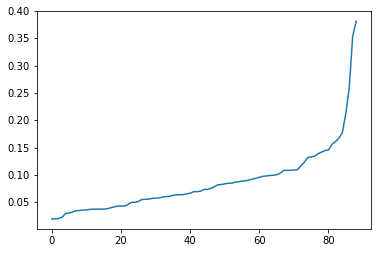

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.sort(X_train_0[np.nonzero(X_train_0)]))

In [41]:
# 特徴量を1値化する

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

pipe = Pipeline([
        ('bin', Binarizer()),
        ('clf', LogisticRegression())
])

In [42]:
# グリッドサーチで、どの閾値で2値化すると良いかを探す
from sklearn.model_selection import GridSearchCV

param = {'bin__threshold':[0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]}

gs1 = GridSearchCV(pipe, param, n_jobs=1, verbose=2)
gs1.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] bin__threshold=0.001 ............................................
[CV] ............................. bin__threshold=0.001, total=  12.6s
[CV] bin__threshold=0.001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s remaining:    0.0s


[CV] ............................. bin__threshold=0.001, total=  12.6s
[CV] bin__threshold=0.001 ............................................
[CV] ............................. bin__threshold=0.001, total=  12.3s
[CV] bin__threshold=0.01 .............................................
[CV] .............................. bin__threshold=0.01, total=  10.3s
[CV] bin__threshold=0.01 .............................................
[CV] .............................. bin__threshold=0.01, total=  10.2s
[CV] bin__threshold=0.01 .............................................
[CV] .............................. bin__threshold=0.01, total=  10.7s
[CV] bin__threshold=0.05 .............................................
[CV] .............................. bin__threshold=0.05, total=   4.9s
[CV] bin__threshold=0.05 .............................................
[CV] .............................. bin__threshold=0.05, total=   4.9s
[CV] bin__threshold=0.05 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [43]:
gs1.best_params_, gs1.best_score_, gs1.best_estimator_

({'bin__threshold': 0.05},
 0.89137351953332156,
 Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))]))

In [44]:
gs1.score(X_test, y_test)

0.82222517259691985

In [45]:
pipe = Pipeline([
        ('bin', Binarizer()),
        ('clf', LogisticRegression())])

param = {'bin__threshold':[0.001, 0.01, 0.05],
                 'clf__C':10**np.arange(1.0, 10.0)}

from sklearn.model_selection import RandomizedSearchCV

gs11 = RandomizedSearchCV(pipe, param, n_jobs=2, verbose=1)
gs11.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  3.5min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'clf__C': array([  1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06,   1.00000e+07,   1.00000e+08,
         1.00000e+09]), 'bin__threshold': [0.001, 0.01, 0.05]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [46]:
gs11.best_params_, gs11.best_score_, gs11.best_estimator_

({'bin__threshold': 0.05, 'clf__C': 100.0},
 0.89110836132225557,
 Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))]))

In [47]:
gs11.best_score_

0.89110836132225557

In [48]:
from sklearn.svm import LinearSVC

pipe = Pipeline([
        ('bin', Binarizer()),
        ('clf', LinearSVC())])

param = {'bin__threshold':[0.001, 0.01, 0.05],
                 'clf__C':10**np.arange(1.0, 10.0)}

from sklearn.model_selection import RandomizedSearchCV

gs11 = RandomizedSearchCV(pipe, param, n_jobs=2, verbose=1)
gs11.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'clf__C': array([  1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06,   1.00000e+07,   1.00000e+08,
         1.00000e+09]), 'bin__threshold': [0.001, 0.01, 0.05]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [49]:
gs11.best_params_, gs11.best_score_, gs11.best_estimator_

({'bin__threshold': 0.05, 'clf__C': 100.0},
 0.88156266572388187,
 Pipeline(steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))]))

In [50]:
# 省略

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = gs11.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.7862    0.7492    0.7673       319
          1     0.6387    0.7044    0.6699       389
          2     0.6853    0.6523    0.6684       394
          3     0.6265    0.6760    0.6503       392
          4     0.7458    0.8000    0.7719       385
          5     0.8412    0.7241    0.7782       395
          6     0.7353    0.8333    0.7812       390
          7     0.8560    0.8258    0.8406       396
          8     0.9258    0.9095    0.9176       398
          9     0.8886    0.9043    0.8964       397
         10     0.9268    0.9524    0.9394       399
         11     0.9039    0.8788    0.8912       396
         12     0.6809    0.6514    0.6658       393
         13     0.8307    0.8056    0.8179       396
         14     0.8844    0.8934    0.8889       394
         15     0.8050    0.8920    0.8462       398
         16     0.7354    0.9011    0.8099       364
         17     0.9758    0.8564    0.9122   

In [53]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[239,   4,   2,   2,   4,   0,   0,   0,   1,   0,   1,   1,   2,
          7,   7,  21,   0,   2,   1,  25],
       [  2, 274,  14,  16,   5,  19,  12,   3,   2,   3,   2,   7,  10,
          4,   3,   4,   4,   0,   1,   4],
       [  1,  29, 257,  46,  13,  17,   7,   3,   1,   1,   0,   3,   6,
          2,   3,   0,   0,   0,   3,   2],
       [  1,  13,  30, 265,  25,   2,  21,   2,   0,   2,   0,   1,  26,
          1,   1,   0,   2,   0,   0,   0],
       [  2,  10,   7,  23, 308,   1,  10,   5,   0,   2,   0,   0,  11,
          1,   2,   1,   0,   0,   2,   0],
       [  1,  40,  33,   7,   6, 286,   8,   1,   0,   4,   2,   3,   2,
          0,   1,   0,   0,   0,   1,   0],
       [  0,   5,   3,  14,  11,   1, 325,   7,   2,   1,   1,   1,  11,
          5,   1,   0,   1,   0,   0,   1],
       [  0,   5,   4,   2,   4,   1,  14, 327,  11,   2,   0,   0,  17,
          2,   0,   0,   3,   0,   4,   0],
       [  1,   2,   0,   1,   3,   0,   5,  10, 362,   1,   0,  

([<matplotlib.axis.XTick at 0x11fece470>,
 <a list of 20 Text xticklabel objects>)

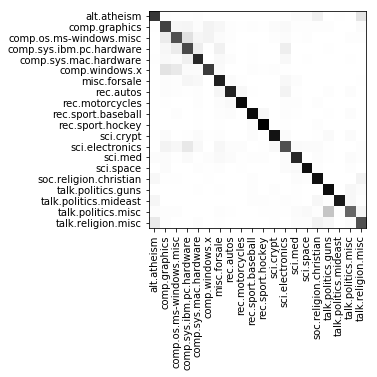

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

plt.imshow(1 - conf_mat / conf_mat.sum(axis=1), interpolation='nearest')

plt.yticks(range(20), newsgroups_train.target_names);
plt.xticks(range(20), newsgroups_train.target_names, rotation=90)

# 黒いほど予測されたクラスが多い